In [12]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import widgets

In [27]:
lbl1 = widgets.Label('Enter division number')
display(lbl1)
text1 = widgets.Text()
display(text1)


Label(value='Enter division number')

Text(value='')

In [28]:
if text1.value is not None and text1.value.strip() != '':
    x = int(text1.value)
else:
    x = None
print(x)

2


In [29]:
cnxn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                      "Server=LAPTOP-2SP4AUHR;"
                      "Database=EA;"
                      "Trusted_Connection=yes;")
cursor = cnxn.cursor()
df = pd.read_sql('SELECT IssueType, COUNT(DISTINCT BugId) Count FROM dbo.bugs GROUP BY IssueType', con=cnxn)
if x is not None and x != 0:
    df['Count'] = df['Count'].div(x)
else:
    df['Count'] = df['Count']

C:\Users\husai\AppData\Local\Temp\ipykernel_3304\1061399215.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('SELECT IssueType, COUNT(DISTINCT BugId) Count FROM dbo.bugs GROUP BY IssueType', con=cnxn)


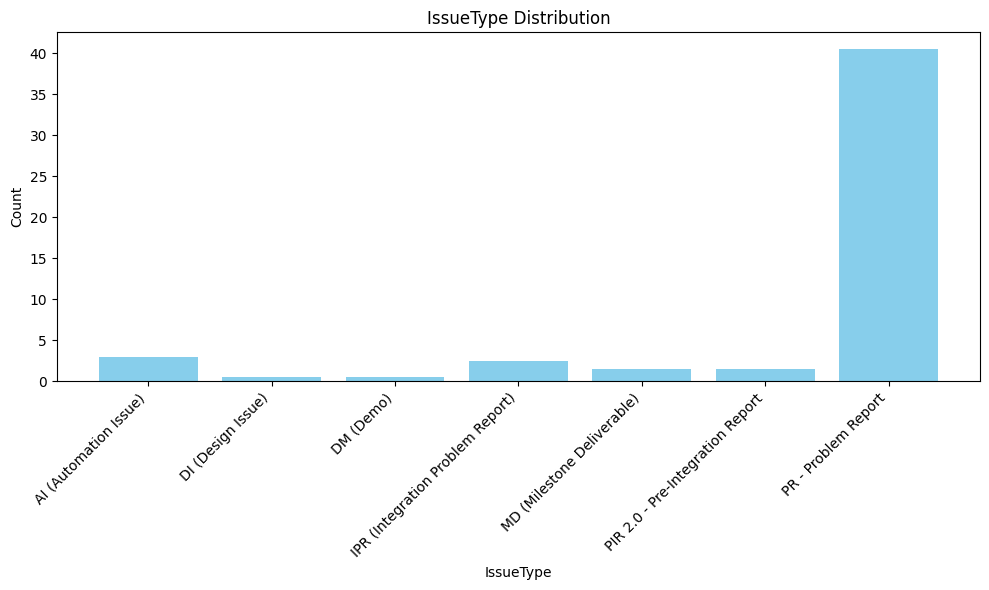

In [30]:
plt.figure(figsize=(10, 6))
plt.bar(df['IssueType'], df['Count'], color='skyblue')
plt.xlabel('IssueType')
plt.ylabel('Count')
plt.title('IssueType Distribution')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()